In [5]:
import warnings
import numpy as np

warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

from thermoengine.const import units
import sys, os

from tcg_slb.phasediagram.equilibrate import EquilibratePD, EquilibratePDGrid, PDEquilibrateGridDiagnostics
from tcg_slb.base import *
from thermoengine.equilibrate import PhaseLibrary
import thermoengine as thermo

db = thermo.model.Database(database='Stixrude')

phases = db.get_phases([
        "Qz",
        #"Grt",  
        "Jd",
        #"En","Fs",
        #"Ky",
        "Ab", #"Fsp",
        #"Rt","Ilm",
        #"Mc"
    ])

phase_library = PhaseLibrary(phases)

eq = EquilibratePD(phase_library) 

mol_comp = {
    "SiO2": 10.,
    "Al2O3":1.,
    "Na2O":1.,
}

comp = thermo.OxideMolComp(**mol_comp)

Tmin = 150+273
Tmax = 825+273
nT = 100
Trange = np.linspace(Tmin,Tmax,nT)
Pmin = 0
Pmax = 2.0
nP = 100
Prange = np.linspace(Pmin,Pmax,nP)

equilgrid = EquilibratePDGrid()

equilgrid.solve(phase_library, ['T', 'p'], Trange, Prange,**{'comp':comp})


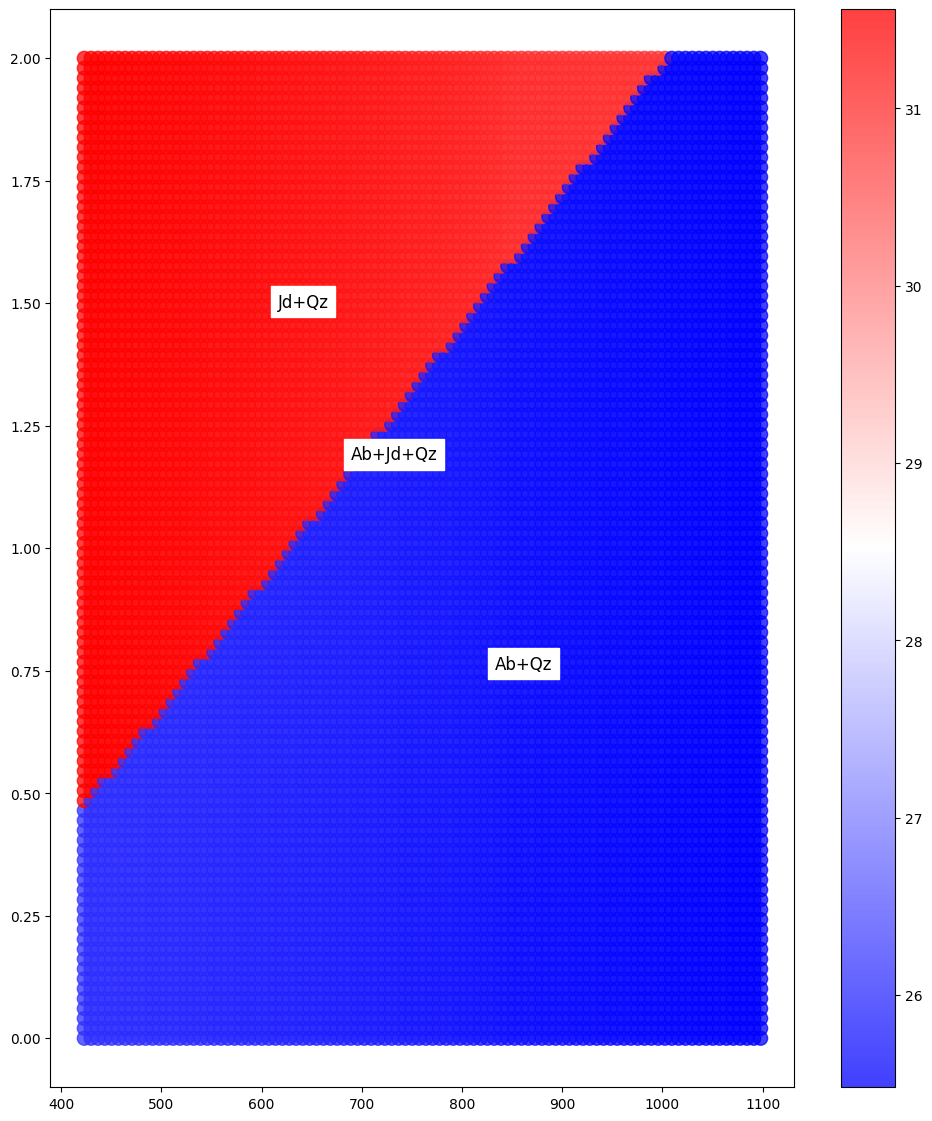

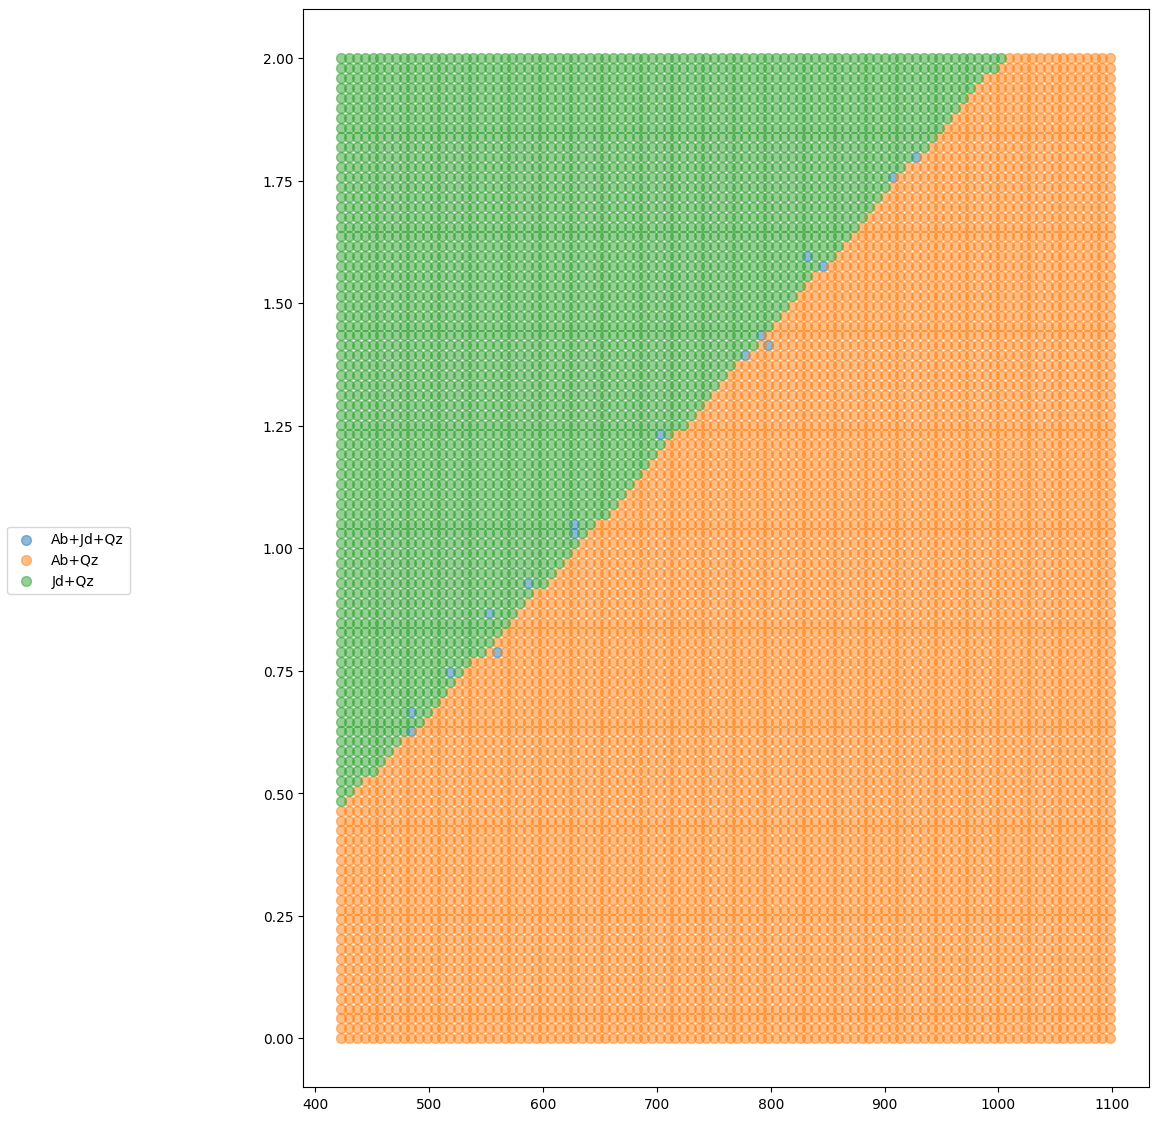

In [6]:

equildiag = PDEquilibrateGridDiagnostics(phase_library, equilgrid)
equildiag.plot_rho()
equildiag.plot_phases()

In [5]:
db = thermo.model.Database(database='Berman')
phases = db.get_phases([
        "Qz",
        #"Grt",  
        "Jd",
        #"En","Fs",
        #"Ky",
        "Ab", #"Fsp",
        #"Rt","Ilm",
        #"Mc"
    ])

phase_library = PhaseLibrary(phases)

comp = thermo.OxideMolComp(**mol_comp)

equilgrid = EquilibratePDGrid()
equilgrid.solve(phase_library, ['T', 'p'], Trange, Prange,**{'comp':comp})

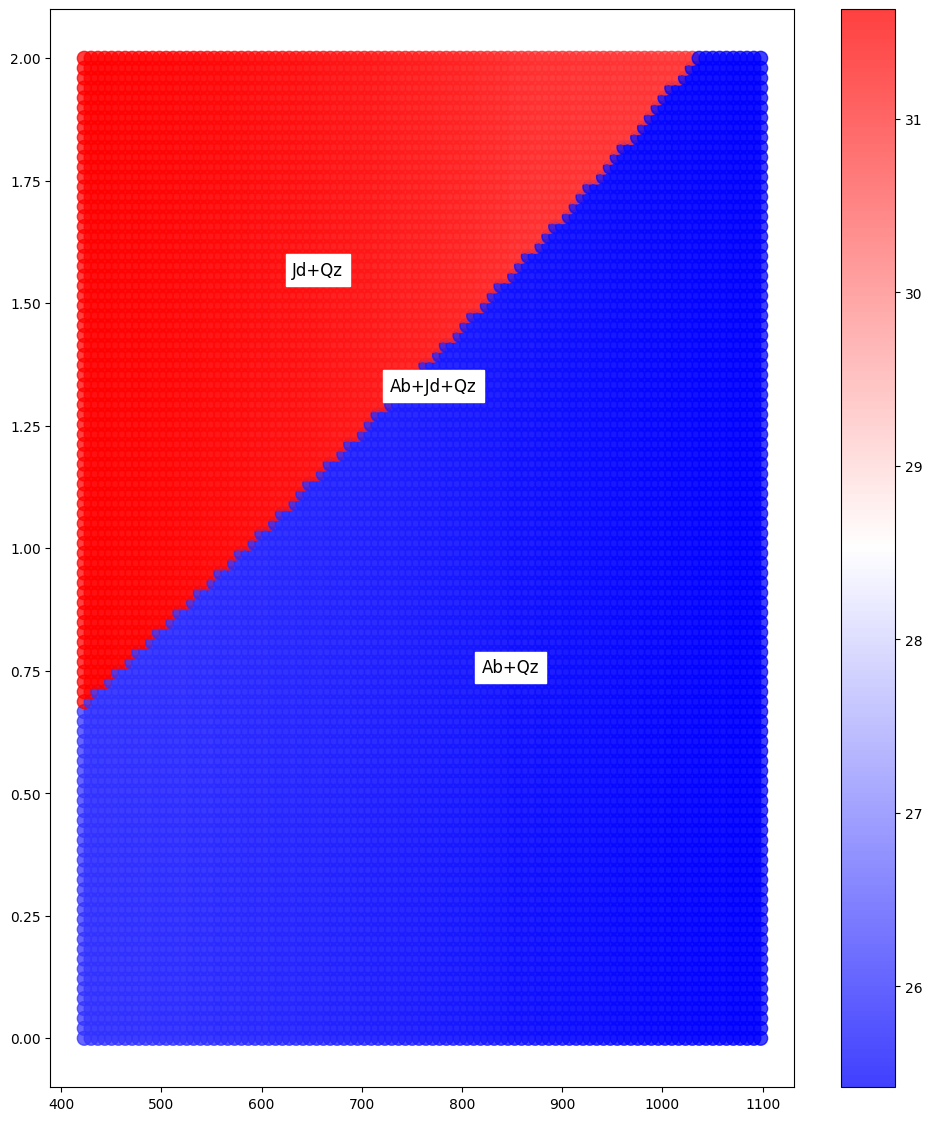

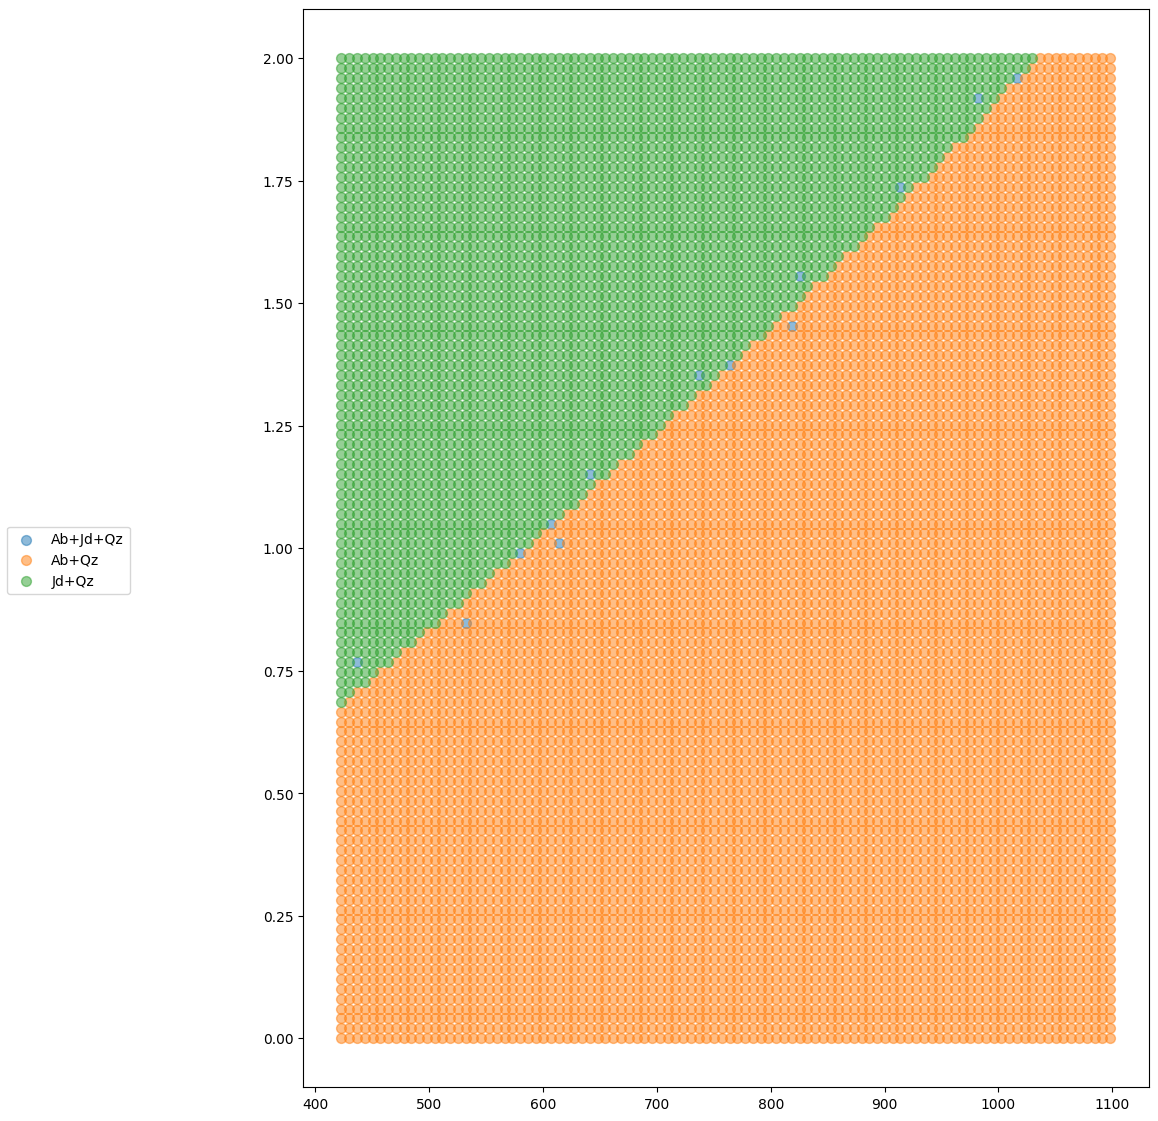

In [6]:
equildiag = PDEquilibrateGridDiagnostics(phase_library, equilgrid)
equildiag.plot_rho()
equildiag.plot_phases()

In [ ]:
sys.path.append(os.path.join(os.path.pardir, 'database', 'install', 'tcg_hgp_database', 'lib', 'python'+pv, 'site-packages/')) # the final slash is necessary!
import py_tcg_hgp_database as hgp

db = thermo.model.Database(hgp)
phases = db.get_phases([
        "q",
        "jd",
        "ab",
    ])

phase_library = PhaseLibrary(phases)

comp = thermo.OxideMolComp(**mol_comp)

equilgrid = EquilibratePDGrid()
equilgrid.solve(phase_library, ['T', 'p'], Trange, Prange,**{'comp':comp})

In [ ]:
equildiag = PDEquilibrateGridDiagnostics(phase_library, equilgrid)
equildiag.plot_rho()
equildiag.plot_phases()